In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px


diabetes = pd.read_csv('../data/diabetes_data.csv')
display(diabetes.head())
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


In [17]:
print('число строк:',diabetes.shape[0])
print('число столбцов:',diabetes.shape[1])

число строк: 778
число столбцов: 10


In [18]:
# diabetes['Pregnancies'].describe()
# diabetes['Pregnancies'].value_counts()

In [19]:
# sber_dt=diabetes.copy()

# fig=px.scatter(
# # fig=px.histogram(
#     data_frame=sber_dt,
#     x='BloodPressure',
#     y='Age',
# )
# fig.show()

8.1

In [20]:
dupl_columns = list(diabetes.columns)                          #создаем список имен столбцов
# dupl_columns.remove('id')                                       #удаляем из списка имя ID

diabetes = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes.shape[0]}')

Результирующее число записей: 768


8.2

In [21]:
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.94:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.94:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [22]:
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Результирующее число признаков: 9


8.3

In [23]:
list_count=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for count in list_count:
    diabetes[count]=diabetes[count].apply(lambda x:x if x>0 else np.nan)

In [24]:
cols_null_percent = diabetes.isnull().mean() # превращает в serias
# фмльтор и сортировка

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null.round(2))

Insulin          0.49
SkinThickness    0.30
BloodPressure    0.05
BMI              0.01
Glucose          0.01
dtype: float64

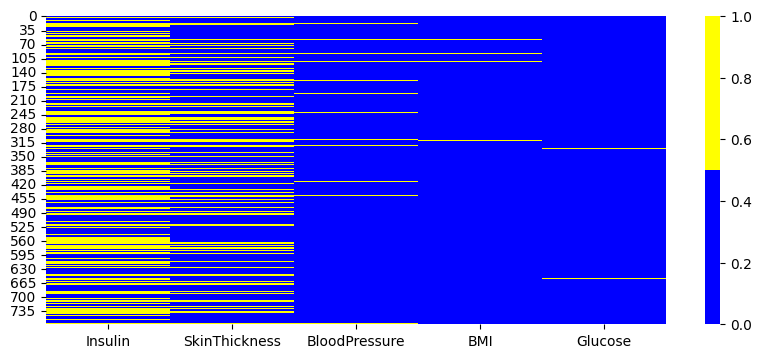

In [25]:
colors = ['blue', 'yellow']       # Список с палитрой цветов 0-1
fig = plt.figure(figsize=(10, 4)) # Размер графика
cols = cols_with_null.index       # Создали переменную и именем столбцов взяли из serias
ax = sns.heatmap(                 # график seaborn. тепловая карта
    diabetes[cols].isnull(),     # DF[ столбцы ]. функция
    cmap=sns.color_palette(colors),#как красить
)

8.4

In [26]:
#создаем копию исходной таблицы
drop_data = diabetes.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data.shape[1]

8

8.5

In [27]:
thresh = drop_data.shape[1]-2
drop_data = drop_data.dropna(thresh=thresh, axis=0)
#отображаем результирующую долю пропусков
drop_data.shape[0]

761

8.6

In [28]:
drop_data.count()
#['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

Pregnancies                 761
Glucose                     756
BloodPressure               733
SkinThickness               541
BMI                         757
DiabetesPedigreeFunction    761
Age                         761
Outcome                     761
dtype: int64

In [29]:
#создаем копию исходной таблицы
fill_data = drop_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Glucose' : fill_data['Glucose'].median(),
    'BloodPressure': fill_data['BloodPressure'].median(),
    'SkinThickness': fill_data['SkinThickness'].median(),
    'BMI': fill_data['BMI'].median(),
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
round(fill_data['SkinThickness'].mean(),1)

29.1

8.7

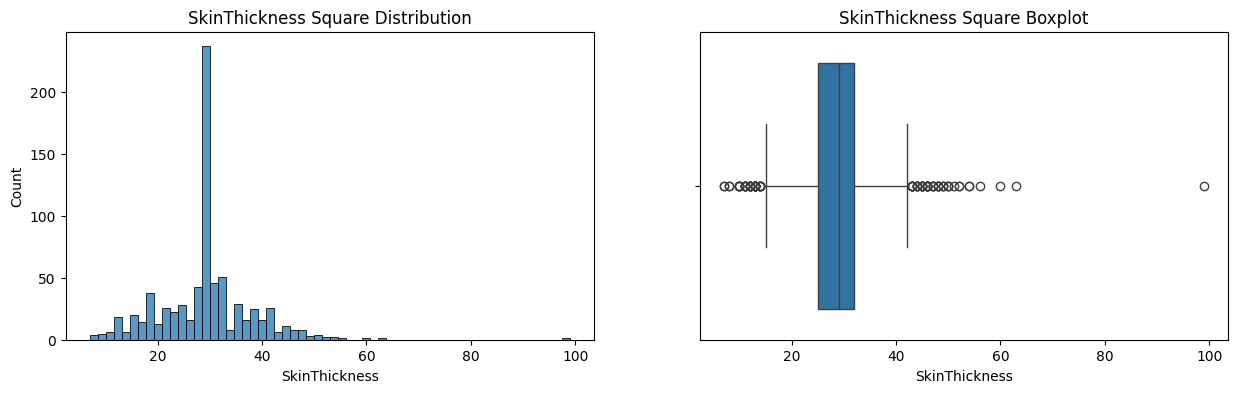

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=fill_data, x='SkinThickness', ax=axes[0]);
histplot.set_title('SkinThickness Square Distribution');
boxplot = sns.boxplot(data=fill_data, x='SkinThickness', ax=axes[1]);
boxplot.set_title('SkinThickness Square Boxplot');

In [31]:
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5, log_scale = False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


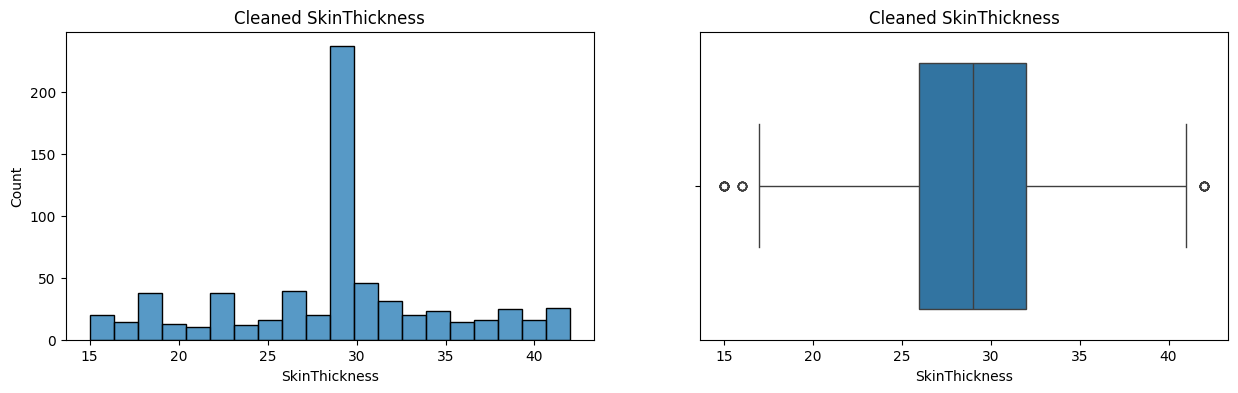

In [32]:
outliers, cleaned = outliers_iqr_mod(fill_data, 'SkinThickness')#,right= 3)#,3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned SkinThickness');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned SkinThickness');

8.8

In [33]:
def outliers_z_score_mod(data, feature, left=3,right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [34]:
outliers, cleaned = outliers_z_score_mod(fill_data, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


8.9

In [35]:
outliers, cleaned = outliers_iqr_mod(fill_data, 'DiabetesPedigreeFunction')#, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


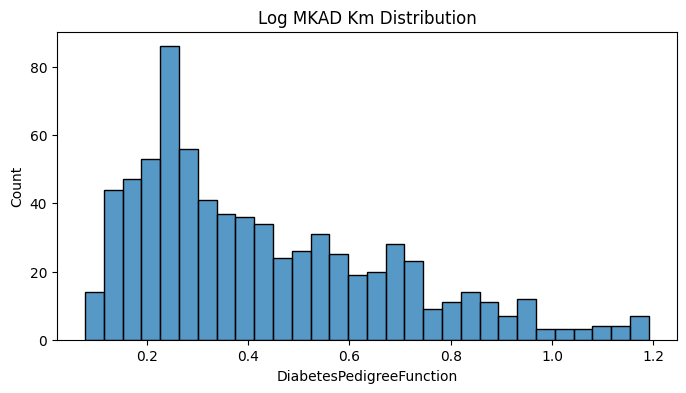

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# log_mkad_km = np.log(fill_data['DiabetesPedigreeFunction'] + 1)
histplot = sns.histplot(cleaned['DiabetesPedigreeFunction'], bins=30, ax=ax)
# histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
# histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
# histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

In [37]:
# Pregnancies — количество беременностей.
# Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
# BloodPressure — диастолическое артериальное давление (мм рт. ст.).
# SkinThickness — толщина кожной складки трицепса (мм).
# Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).
# BMI — индекс массы тела (вес в кг рост в м).
# DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
# Age — возраст.
# Outcome — наличие диабета (0 — нет, 1 — да).